In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ziyadintern","key":"0a4ff0b42bd5b65abdc9589abb85fc33"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d greatgamedota/vggface2-test


Dataset URL: https://www.kaggle.com/datasets/greatgamedota/vggface2-test
License(s): unknown
 99% 1.96G/1.97G [00:25<00:00, 14.3MB/s]
100% 1.97G/1.97G [00:25<00:00, 82.3MB/s]


In [ ]:
!mv vggface2-test.zip /content/drive/MyDrive/


In [ ]:
!unzip /content/drive/MyDrive/vggface2-test.zip -d /content/drive/MyDrive/vggface2-test/


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0173_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0174_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0176_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0179_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0180_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0181_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0183_03.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0192_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0194_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0195_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0208_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0211_02.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0212_01.jpg  
  inflating: 

In [ ]:
!pip install tensorflow keras


In [ ]:
!pip install keras-facenet


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.5 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=0fa1c036ddbe87c307f4cdb342bb9d13f6d0bfc473994fe23b7ac1bdd70dc9a5
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
import tensorflow as tf
from keras_facenet import FaceNet
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (160, 160)  # FaceNet input size
TRAIN_DIR = '/content/drive/MyDrive/test_vggface'  # Training dataset directory
NUM_CLASSES = 10  # Adjust to your number of face classes


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the data for validation
)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Use this for the training set
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Use this for the validation set
)


Found 3081 images belonging to 10 classes.
Found 765 images belonging to 10 classes.


In [ ]:
# Load the pre-trained FaceNet model
facenet_model = FaceNet()

# Extract embeddings from FaceNet and use them for classification
inputs = tf.keras.layers.Input(shape=(160, 160, 3))
embeddings = facenet_model.model(inputs)

In [ ]:
# Add classification layers
x = Flatten()(embeddings)  # Flatten the embeddings
x = Dense(128, activation='relu')(x)  # Add a fully connected layer
x = Dropout(0.5)(x)  # Dropout to reduce overfitting
output = Dense(NUM_CLASSES, activation='softmax')(x)  # Output layer for classification


In [ ]:
# Define the new model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
EPOCHS = 20  # Adjust this based on your hardware and needs

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 1934s 18s/step - accuracy: 0.5782 - loss: 2.0187 - val_accuracy: 0.8465 - val_loss: 1.4097
Epoch 2/20
 1/96 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.8750 - loss: 1.4965

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.8750 - loss: 1.4965 - val_accuracy: 0.6552 - val_loss: 1.5702
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.9070 - loss: 1.2342 - val_accuracy: 0.9484 - val_loss: 0.9116
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.9513 - val_accuracy: 0.9310 - val_loss: 0.8705
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.9220 - loss: 0.8762 - val_accuracy: 0.9239 - val_loss: 0.6616
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.6537 - val_accuracy: 0.9655 - val_loss: 0.5603
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 300ms/step - accuracy: 0.9125 - loss: 0.6873 - val_accuracy: 0.9307 - val_loss: 0.4733
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.4986 - val_accuracy: 0.9310 - val_loss: 0.4576
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - accuracy: 0.9345 - loss: 0.5101 - val_accuracy: 0.9565 - val_l

In [ ]:
model.save('/content/drive/MyDrive/models_face_recognition/facenet_face_recognition.keras')

In [ ]:
# Evaluate the model on training data
loss, accuracy = model.evaluate(train_generator)
print(f'Training Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


97/97 ━━━━━━━━━━━━━━━━━━━━ 28s 293ms/step - accuracy: 0.9496 - loss: 0.2454
Training Accuracy: 94.84%
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.9510 - loss: 0.2123
Validation Accuracy: 94.25%


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


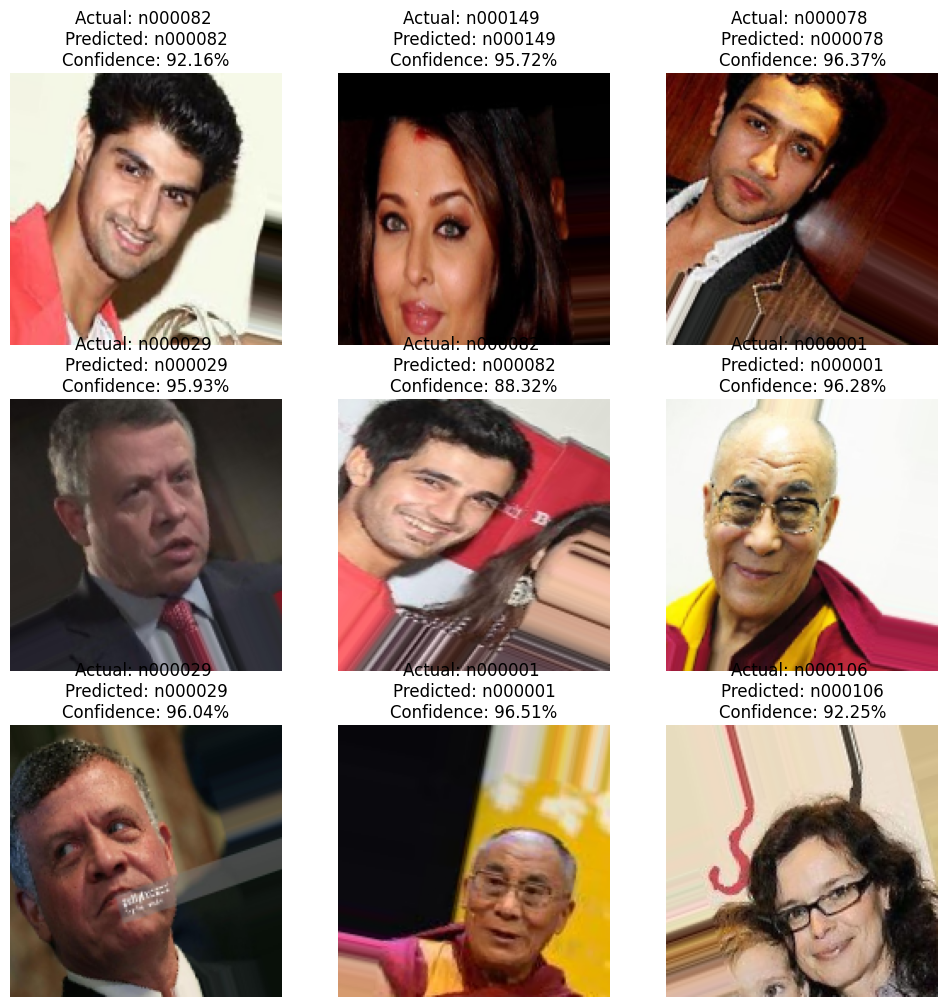

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to predict random images from the validation generator
def predict_random_images(generator, model, num_images=9):
    # Get class indices and names
    class_indices = generator.class_indices
    class_names = list(class_indices.keys())  # Class names in the order of their indices
    total_batches = len(generator)  # Total number of batches
    num_batches = (num_images + generator.batch_size - 1) // generator.batch_size  # Number of batches needed

    # Randomly select batch indices
    random_batches = random.sample(range(total_batches), num_batches)

    images = []
    actual_labels = []
    predicted_classes = []
    confidences = []

    for batch_idx in random_batches:
        # Get the batch of images and labels
        batch_images, batch_labels = generator[batch_idx]

        # Make predictions for the batch
        predictions = model.predict(batch_images)

        # Loop through each image in the batch
        for i in range(len(batch_images)):
            if len(images) >= num_images:
                break  # Stop if we have enough images
            images.append(batch_images[i])
            actual_labels.append(batch_labels[i])
            predicted_class = np.argmax(predictions[i])
            predicted_classes.append(predicted_class)
            confidences.append(np.max(predictions[i]) * 100)  # Get confidence score

    # Plot the images with their actual and predicted labels
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # Display the image
        plt.title(f"Actual: {class_names[np.argmax(actual_labels[i])]} \n"  # Getting the actual class name
                  f"Predicted: {class_names[predicted_classes[i]]}\n"
                  f"Confidence: {confidences[i]:.2f}%")
        plt.axis("off")
    plt.show()

# Call the function to predict 9 random images from the validation generator
predict_random_images(val_generator, model, num_images=9)
